In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
hepatitis = pd.read_csv('Hepatitis.csv')

In [41]:
print(hepatitis.isna().sum())

# We found some missing values due to a lack of data measurements

Unnamed: 0               0
RegionName               0
Time                     0
Category_gender          0
Category_age             0
Chronic_percentage    1764
Acute_percentage       468
dtype: int64


<Axes: >

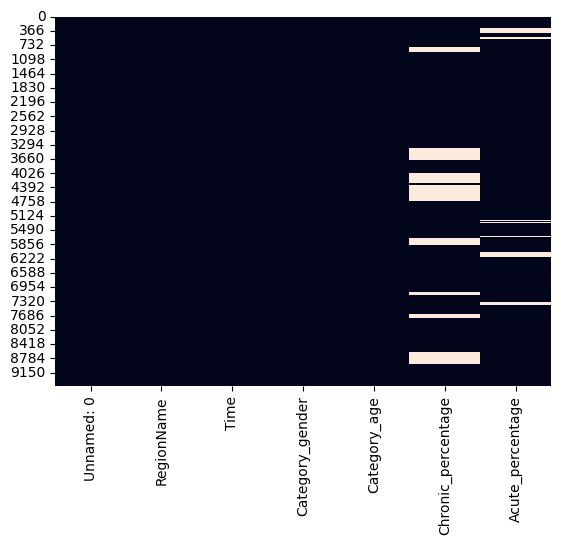

In [42]:
# heatmap to visualize where the Nan values are
sns.heatmap(hepatitis.isnull(), cbar=False)

In [43]:
# Ensure that you're working with the original DataFrame and avoid modifying a copy
hepatitis.loc[:, 'Acute_percentage'] = (
    hepatitis.groupby('RegionName')['Acute_percentage']
    .transform(lambda x: x.interpolate(method='linear'))
)


In [44]:
#Forward or Backward Fill: Use ffill or bfill to fill remaining NaNs with the last or next available value, respectively

hepatitis['Acute_percentage'] = hepatitis.groupby('RegionName')['Acute_percentage'].transform(lambda x: x.interpolate(method='linear').ffill().bfill())

In [45]:
hepatitis.loc[:, 'Chronic_percentage'] = (
    hepatitis.groupby('RegionName')['Chronic_percentage']
    .transform(lambda x: x.interpolate(method='linear').ffill().bfill())
)

In [46]:
hepatitis.isna().sum()

Unnamed: 0              0
RegionName              0
Time                    0
Category_gender         0
Category_age            0
Chronic_percentage    954
Acute_percentage        0
dtype: int64

In [ ]:
hepatitis

we are not able to replace the missing values of 'Chronic_percentage' for France, as all the values are missing.
We will leave them like Nan as is just a 5% of the total values and they won't affect the machine learning model too much



In [9]:
hepatitis.describe()

,Unnamed: 0,Time,Chronic_percentage,Acute_percentage
count,9504.000000,9504.000000,8550.000000,9504.000000
mean,4751.500000,2014.973485,0.357936,4.855457
std,2743.712813,5.041690,1.083153,7.327497
min,0.000000,2006.000000,0.000000,0.000000
25%,2375.750000,2011.000000,0.000000,0.000000
50%,4751.500000,2015.000000,0.000000,2.345000
75%,7127.250000,2019.000000,0.197500,7.040000
max,9503.000000,2023.000000,17.250000,100.000000


In [47]:
hepatitis['Category_gender'].value_counts() 


Category_gender
Female    4752
Male      4752
Name: count, dtype: int64

In [48]:
hepatitis['Category_age'].value_counts()

Category_age
0-4      1056
15-19    1056
20-24    1056
25-34    1056
35-44    1056
45-54    1056
5-14     1056
55-64    1056
65+      1056
Name: count, dtype: int64

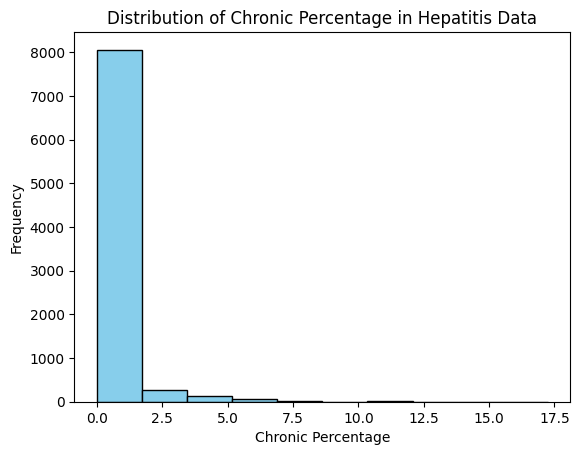

In [49]:
#This histogram visualizes how frequently each range of Chronic_percentage occurs in the dataset
# allowing you to assess the spread, central tendency, and presence of any potential skew in these values.
plt.hist(hepatitis['Chronic_percentage'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Chronic Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Chronic Percentage in Hepatitis Data')
plt.show()

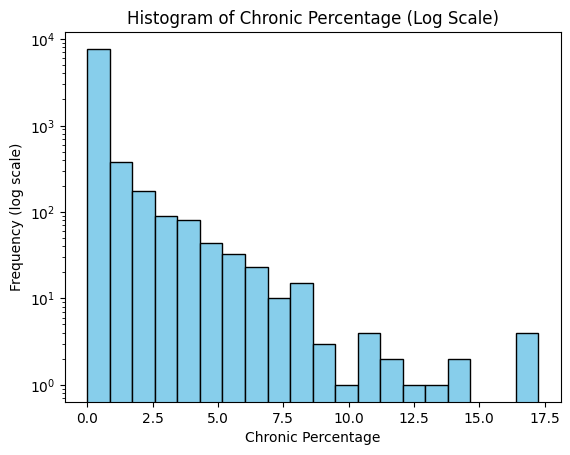

In [50]:
plt.hist(hepatitis['Chronic_percentage'], bins=20, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title("Histogram of Chronic Percentage (Log Scale)")
plt.xlabel("Chronic Percentage")
plt.ylabel("Frequency (log scale)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

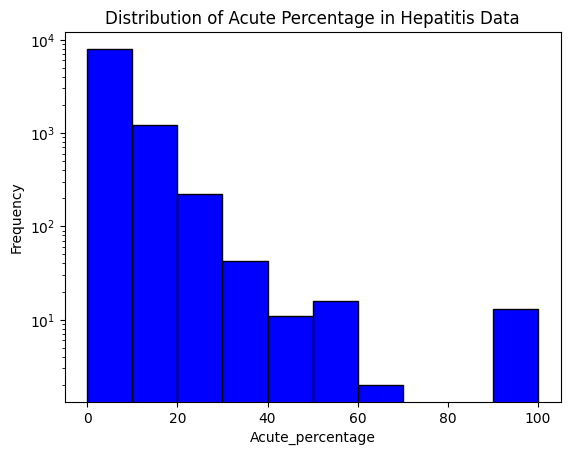

In [14]:
plt.hist(hepatitis['Acute_percentage'], bins=10, color='blue', edgecolor= 'black')
plt.yscale('log')
plt.xlabel('Acute_percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Acute Percentage in Hepatitis Data')
plt.show

In [51]:
# Filter rows with 100% in Acute_percentage
suspect_rows = hepatitis[hepatitis['Acute_percentage'] == 100]
print(suspect_rows)


      Unnamed: 0     RegionName  Time Category_gender Category_age  \
499          499        Croatia  2022            Male        35-44   
588          588         Cyprus  2012            Male        25-34   
653          653         Cyprus  2016          Female        45-54   
751          751         Cyprus  2021            Male        35-44   
786          786         Cyprus  2023            Male        25-34   
4838        4838        Iceland  2019            Male        45-54   
4844        4844        Iceland  2020          Female        20-24   
5268        5268          Italy  2021            Male        25-34   
5686        5686  Liechtenstein  2023            Male        55-64   
5953        5953     Luxembourg  2013            Male        35-44   
5971        5971     Luxembourg  2014            Male        35-44   
7432        7432       Portugal  2011            Male        55-64   
8566        8566       Slovenia  2020            Male        55-64   

      Chronic_perce

In [52]:
# Replace 100% values in Acute_percentage with NaN
hepatitis.loc[hepatitis['Acute_percentage'] == 100, 'Acute_percentage'] = None

# Interpolate NaN values
hepatitis['Acute_percentage'] = hepatitis.groupby('RegionName')['Acute_percentage'].transform(lambda x: x.interpolate(method='linear'))


In [53]:
hepatitis.rename(columns={'RegionName': 'Country', 'Category_gender': 'Gender', 'age': 'Age'}, inplace=True)
hepatitis

,Unnamed: 0,Country,Time,Gender,Category_age,Chronic_percentage,Acute_percentage
0,0,Austria,2008,Female,0-4,0.00,0.00
1,1,Austria,2008,Female,15-19,0.00,10.92
2,2,Austria,2008,Female,20-24,0.00,2.08
3,3,Austria,2008,Female,25-34,0.00,11.96
4,4,Austria,2008,Female,35-44,0.00,7.28
...,...,...,...,...,...,...,...
9499,9499,United Kingdom,2019,Male,35-44,1.53,11.59
9500,9500,United Kingdom,2019,Male,45-54,0.90,12.20
9501,9501,United Kingdom,2019,Male,5-14,0.00,0.00
9502,9502,United Kingdom,2019,Male,55-64,0.45,9.15


In [54]:
suspect_rows = hepatitis[hepatitis['Acute_percentage'] == 100]
print(suspect_rows)


Empty DataFrame
Columns: [Unnamed: 0, Country, Time, Gender, Category_age, Chronic_percentage, Acute_percentage]
Index: []


In [55]:
hepatitis = hepatitis.drop(columns=['Unnamed: 0'])

In [56]:
hepatitis.to_csv('Hepatitis_eda.csv')

In [57]:
hepatitis.isnull().sum()

Country                 0
Time                    0
Gender                  0
Category_age            0
Chronic_percentage    954
Acute_percentage        0
dtype: int64

In [58]:
hepatitis.head()

,Country,Time,Gender,Category_age,Chronic_percentage,Acute_percentage
0,Austria,2008,Female,0-4,0.0,0.00
1,Austria,2008,Female,15-19,0.0,10.92
2,Austria,2008,Female,20-24,0.0,2.08
3,Austria,2008,Female,25-34,0.0,11.96
4,Austria,2008,Female,35-44,0.0,7.28


<Axes: xlabel='Chronic_percentage'>

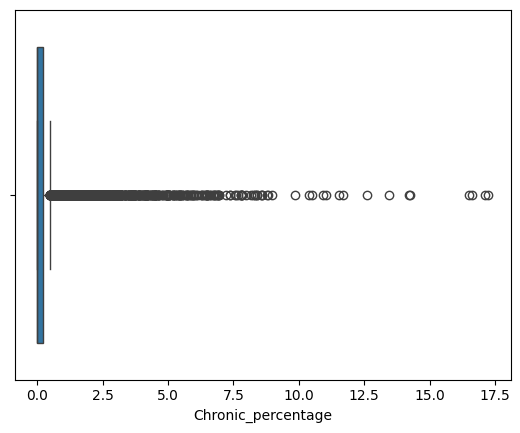

In [59]:
sns.boxplot(x='Chronic_percentage', data=hepatitis)

In [60]:
hepatitis[['Chronic_percentage', 'Acute_percentage']].corr()

,Chronic_percentage,Acute_percentage
Chronic_percentage,1.000000,0.217996
Acute_percentage,0.217996,1.000000


<Axes: xlabel='Chronic_percentage', ylabel='Acute_percentage'>

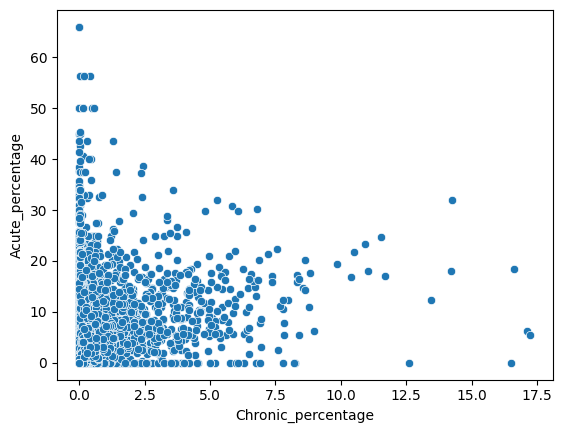

In [61]:
sns.scatterplot(x='Chronic_percentage', y='Acute_percentage', data=hepatitis)

# We now proceed to create a Machine Learning model

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [70]:
# Encoding of category columns

label_encoders = {}
categorical_columns = ['Country', 'Gender', 'Category_age']
for col in categorical_columns:
    le = LabelEncoder()
    hepatitis[col] = le.fit_transform(hepatitis[col])
    label_encoders[col] = le  # save to encode future values

scaler = StandardScaler()
hepatitis[['Time']] = scaler.fit_transform(hepatitis[['Time']])



In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Colonne categoriche
categorical_cols = ['Country', 'Gender', 'Category_age']

# Prepara l'encoder
encoder = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'  # Mantiene le altre colonne (es. Time)
)

# Trasforma i dati
X_chronic_encoded = encoder.fit_transform(X_chronic)
X_acute_encoded = encoder.transform(X_acute)  # Usa lo stesso encoder per coerenza


ValueError: Found unknown categories [11, 14, 30] in column 0 during transform

In [72]:
# create a datset that exclude Nan values for France
chronic = hepatitis[hepatitis['Chronic_percentage'].notnull()]

# Crea un dataset completo per Acute_percentage
X_acute = hepatitis[['Country', 'Gender', 'Category_age', 'Time']]
y_acute = hepatitis['Acute_percentage']

# Features e target per Chronic_percentage
X_chronic = chronic[['Country', 'Gender', 'Category_age', 'Time']]
y_chronic = chronic['Chronic_percentage']


In [73]:
X_train_chronic, X_test_chronic, y_train_chronic, y_test_chronic = train_test_split(
    X_chronic, y_chronic, test_size=0.2, random_state=42)

# Divisione per Acute_percentage
X_train_acute, X_test_acute, y_train_acute, y_test_acute = train_test_split(
    X_acute, y_acute, test_size=0.2, random_state=42)

In [74]:
from sklearn.metrics import mean_absolute_error

# Modello per Chronic_percentage
model_chronic = RandomForestRegressor(random_state=42)
model_chronic.fit(X_train_chronic, y_train_chronic)

# Valutazione sul test set
y_pred_chronic = model_chronic.predict(X_test_chronic)
mae_chronic = mean_absolute_error(y_test_chronic, y_pred_chronic)
print(f"MAE for Chronic_percentage: {mae_chronic}")

# Modello per Acute_percentage
model_acute = RandomForestRegressor(random_state=42)
model_acute.fit(X_train_acute, y_train_acute)

# Valutazione sul test set
y_pred_acute = model_acute.predict(X_test_acute)
mae_acute = mean_absolute_error(y_test_acute, y_pred_acute)
print(f"MAE for Acute_percentage: {mae_acute}")


MAE for Chronic_percentage: 0.10359666666666671
MAE for Acute_percentage: 2.2430203577064702


In [75]:
# Nuovi dati di esempio
new_data = pd.DataFrame({
    'Country': ['Austria', 'France'],
    'Gender': ['Female', 'Male'],
    'Category_age': ['25-34', '15-19'],
    'Time': [2008, 2009]
})

# Trasforma i nuovi dati
new_data_encoded = encoder.transform(new_data)

# Previsioni per Chronic_percentage
chronic_predictions = model_chronic.predict(new_data_encoded)
print(f"Predictions for Chronic_percentage: {chronic_predictions}")

# Previsioni per Acute_percentage
acute_predictions = model_acute.predict(new_data_encoded)
print(f"Predictions for Acute_percentage: {acute_predictions}")


NameError: name 'encoder' is not defined

In [31]:
# Modelli per le due previsioni
model_chronic = RandomForestRegressor(random_state=42)
model_acute = RandomForestRegressor(random_state=42)

# Addestramento
model_chronic.fit(X_train, y_train_chronic)
model_acute.fit(X_train, y_train_acute)


ValueError: Input y contains NaN.

In [ ]:
X = pd.get_dummies(X, columns=['Gender', 'Country', 'Age'])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


ValueError: Input y contains NaN.